# project 3:search relevance prediction 

## step 1: import data

In [48]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer 


In [2]:
### import train and test set and product description data

In [3]:
df_train = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone_three/train.csv', encoding ="ISO-8859-1")
df_test = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone_three/test.csv', encoding ="ISO-8859-1")

In [4]:
df_desc = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone_three/product_descriptions.csv')

In [5]:
df_train.head(5)

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [6]:
df_desc.head(5)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [7]:
df_all = pd.concat((df_train,df_test),axis = 0, ignore_index = True)

In [8]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [9]:
df_all = pd.merge(df_all, df_desc, how = "left", on = 'product_uid')

In [10]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...


## step 2: data preprocessing and wrangling

In [11]:
### text normalization, here we use stemmer first

In [12]:
stemmer = SnowballStemmer('english')
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [13]:
### counter thew  numbers of a word occourred 

In [14]:
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [15]:
#apply this method to one column

In [16]:
df_all['search_term'] = df_all['search_term'].map(lambda x: str_stemmer(x))

In [17]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angl bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower onli faucet,2.67,Update your bathroom with the Delta Vero Singl...


In [18]:
#apply this method to all columns 

In [19]:
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stemmer(x))

In [20]:
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stemmer(x))

In [21]:
df_all.head(5)

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,simpson strong-ti 12-gaug angl,angl bracket,3.00,"not onli do angl make joint stronger, they als..."
1,3,100001,simpson strong-ti 12-gaug angl,l bracket,2.50,"not onli do angl make joint stronger, they als..."
2,9,100002,behr premium textur deckov 1-gal. #sc-141 tugb...,deck over,3.00,behr premium textur deckov is an innov solid c...
3,16,100005,delta vero 1-handl shower onli faucet trim kit...,rain shower head,2.33,updat your bathroom with the delta vero single...
4,17,100005,delta vero 1-handl shower onli faucet trim kit...,shower onli faucet,2.67,updat your bathroom with the delta vero single...


## step 3: Exploratory Data Analysis 

In [ ]:
# we want to check any missing data or outliers for any columns

In [27]:
df_all_null = (df_all.isnull().sum()/len(df_all))*100
df_all_null

id                      0.000000
product_uid             0.000000
product_title           0.000000
search_term             0.000000
relevance              69.236169
product_description     0.000000
dtype: float64

In [29]:
missing_data = pd.DataFrame({'Miss_data_Ratio':df_all_null})
missing_data.head(20)

,Miss_data_Ratio
id,0.000000
product_uid,0.000000
product_title,0.000000
search_term,0.000000
relevance,69.236169
product_description,0.000000


### no worry, I check the test set, there is no relvevance cloumns in that set, so this missing ratio is "come" from the test set.Anythinelse is okay.

In [ ]:
#we want to check the distribution of the relevance score

In [35]:
relevance = df_train.relevance.values

In [36]:
relevance

array([3.  , 2.5 , 3.  , ..., 2.33, 3.  , 2.33])

e:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 2.38 and sigma = 0.53


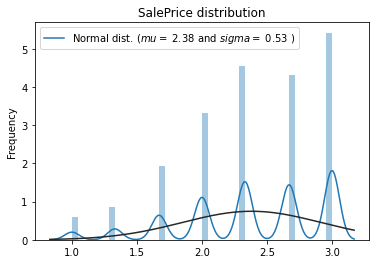

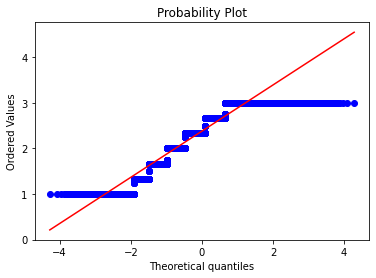

In [51]:

sns.distplot(relevance,fit = norm);
(mu,sigma) = norm.fit(relevance)
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))
plt.legend(['Normal dist. ($mu=$ {:.2f} and $sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(relevance,plot=plt)
plt.show()

In [ ]:
### most of them are drop in 2~3 which means most of the releveance score is closed to the 3(most accuracy)

## step 4: feature engineering

### create some new numeric features for future use 

In [23]:
# import levenshtein distance to measure the numeric distance between search term and product title; search and product description

In [24]:
import Levenshtein
Levenshtein.ratio('hello','hello world')

0.625

In [25]:
df_all['dist_in_title'] =df_all.apply(lambda x:Levenshtein.ratio(x['search_term'], x["product_title"]), axis = 1)

In [26]:
df_all['dist_in_desc'] = df_all.apply(lambda x:Levenshtein.ratio(x['search_term'],x['product_description']), axis=1)

In [27]:
# create a new column which merge the product_ title and product description for construct a corpus

In [28]:
df_all['all_texts']=df_all['product_title'] + ' . ' + df_all['product_description'] + ' . '

In [29]:
df_all['all_texts'][:5]

0    simpson strong-ti 12-gaug angl . not onli do a...
1    simpson strong-ti 12-gaug angl . not onli do a...
2    behr premium textur deckov 1-gal. #sc-141 tugb...
3    delta vero 1-handl shower onli faucet trim kit...
4    delta vero 1-handl shower onli faucet trim kit...
Name: all_texts, dtype: object

In [30]:
# import gensim for tokenize and dictionary 

In [31]:
from gensim.utils import tokenize
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(list(tokenize(x, errors = 'ignore')) for x in df_all['all_texts'].values)
print(dictionary)

Dictionary(221877 unique tokens: ['a', 'against', 'alonehelp', 'also', 'and']...)


In [32]:
### scan the dictionary and transfer this dictionary to bags of words

In [33]:
class MyCorpus(object):
    def __iter__(self):
        for x in df_all['all_texts'].values:
            yield dictionary.doc2bow(list(tokenize(x, errors='ignore')))
            
            
corpus = MyCorpus()

In [34]:
# import TF-iDF and apply this package to the dictionary

In [35]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)

In [36]:
tfidf[dictionary.doc2bow(list(tokenize('hello world, good morning', errors='ignore')))]

[(1001, 0.2947139124944075),
 (3433, 0.28760732706613895),
 (33767, 0.6587176730120703),
 (35250, 0.6296957697663794)]

### need to build a function to standardize the size of the vectors, as different setence has different size, we need to fill all the vectors with 0s -- scale standardization step

In [37]:
from gensim.similarities import MatrixSimilarity

def to_tfidf(text):
    res = tfidf[dictionary.doc2bow(list(tokenize(text, errors = 'ignore')))]
    return res

def cos_sim(text1, text2):
    tfidf1 = to_tfidf(text1)
    tfidf2 = to_tfidf(text2)
    index = MatrixSimilarity([tfidf1],num_features=len(dictionary))
    sim = index[tfidf2]
    return float(sim[0])
    

In [38]:
## do a test for the function above

In [39]:
text1 = 'hello world'
text2 = 'hello from the other side'
cos_sim(text1, text2)

0.8566456437110901

In [40]:
#apply the function above to calculate the similarities of the three columns 

SyntaxError: invalid syntax (<ipython-input-40-b7e53b5213c0>, line 1)

In [41]:
df_all['tfidf_cos_sim_in_title'] = df_all.apply(lambda x: cos_sim(x['search_term'], x['product_title']), axis=1)

In [42]:
df_all['tfidf_cos_sim_in_title'][:5]

0    0.274539
1    0.000000
2    0.000000
3    0.133577
4    0.397320
Name: tfidf_cos_sim_in_title, dtype: float64

In [43]:
df_all['tfidf_cos_sim_in_desc'] = df_all.apply(lambda x: cos_sim(x['search_term'], x['product_description']), axis=1)

In [44]:
df_all['tfidf_cos_sim_in_desc'][:5]

0    0.182836
1    0.000000
2    0.053455
3    0.043712
4    0.098485
Name: tfidf_cos_sim_in_desc, dtype: float64

In [45]:
# drop all the non-numerical features for modeling

In [46]:
df_all.drop(['search_term','product_title','product_description','all_texts'], inplace = True, axis =1 )

In [47]:
df_all.head()

,id,product_uid,relevance,dist_in_title,dist_in_desc,tfidf_cos_sim_in_title,tfidf_cos_sim_in_desc
0,2,100001,3.00,0.190476,0.030418,0.274539,0.182836
1,3,100001,2.50,0.153846,0.022901,0.000000,0.000000
2,9,100002,3.00,0.175000,0.017875,0.000000,0.053455
3,16,100005,2.33,0.326087,0.048632,0.133577,0.043712
4,17,100005,2.67,0.382979,0.054545,0.397320,0.098485


In [48]:
#in sum, right now ,we have four new columns which derived from the old columns, we use two methods which are Levenshtein and tfidf

## step 4: spilit the data set back to train & test set

In [49]:
df_train = df_all.loc[df_train.index]
df_test = df_all.loc[df_test.index]

In [50]:
test_ids = df_test['id']

In [51]:
y_train = df_train['relevance'].values

In [52]:
X_train = df_train.drop(['id','relevance'],axis=1).values
X_test = df_test.drop(['id','relevance'],axis=1).values

# step 5: Model selection 

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [54]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import warnings   

In [55]:
params = [1,3,5,6,7,8,9,10]
rfr_test_scores = []


for param in params:
    rfr = RandomForestRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(rfr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    rfr_test_scores.append(np.mean(test_score))

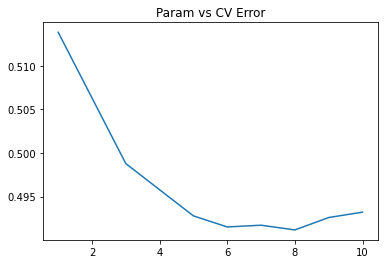

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, rfr_test_scores)
plt.title("Param vs CV Error");

In [57]:
print(rfr_test_scores)

[0.5138314108832868, 0.4987813185023916, 0.4927863178745923, 0.4915212314009955, 0.49171811871436855, 0.49118056549639794, 0.49260115763408513, 0.49321737945688493]


In [58]:
params = [1,3,5,6,7,8,9,10]
gbr_test_scores = []

#X_train = X_train.fillna(X_train.mean(),inplace = True)
#y_train = y_train.fillna(y_train.mean(),inplace = True)
for param in params:
    gbr = GradientBoostingRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    gbr_test_scores.append(np.mean(test_score))

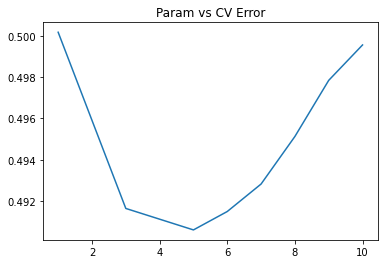

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, gbr_test_scores)
plt.title("Param vs CV Error");

In [60]:
print(gbr_test_scores)

[0.5001868372738553, 0.49163155567731753, 0.49058901121098275, 0.4914825614962283, 0.4928170074675302, 0.49512607268956277, 0.49785071789134666, 0.4995697155664969]


In [61]:
params = [1,3,5,6,7,8,9,10]
xgb_test_scores = []

#X_train = X_train.fillna(X_train.mean(),inplace = True)
#y_train = y_train.fillna(y_train.mean(),inplace = True)
for param in params:
    xgb = XGBRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    xgb_test_scores.append(np.mean(test_score))

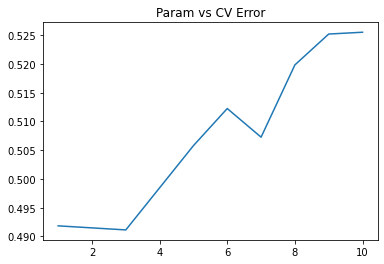

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, xgb_test_scores)
plt.title("Param vs CV Error");

In [63]:
print(xgb_test_scores)

[0.49184231507761156, 0.4911361924114937, 0.5057970280934803, 0.5122533269808635, 0.5072721970307731, 0.5198433254873253, 0.5252132355807195, 0.525525518766657]


# step 6: Choose the best model and caculate the result

In [64]:
rfr = RandomForestRegressor(n_estimators=30, max_depth=6)

In [65]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=30)

In [66]:
y_pred = rfr.predict(X_test)

In [67]:
pd.DataFrame({"id": test_ids, "relevance": y_pred}).to_csv('submission.csv',index=False)

In [70]:
y_pred

array([2.45651444, 2.0455801 , 2.20320464, ..., 2.59010177, 2.47996452,
       2.27970175])